In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
import numpy as np

11490434/11490434 [==============================] - 0s 0us/step


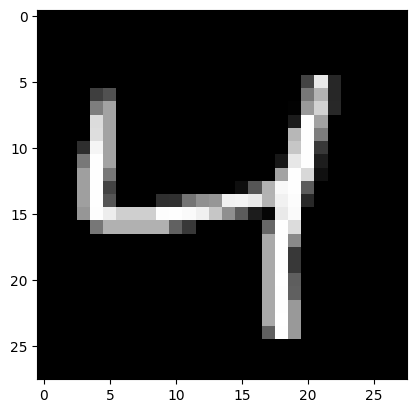

label 4


In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
plt.imshow(x_train[2],cmap = 'gray')
plt.show()
print("label", y_train[2])

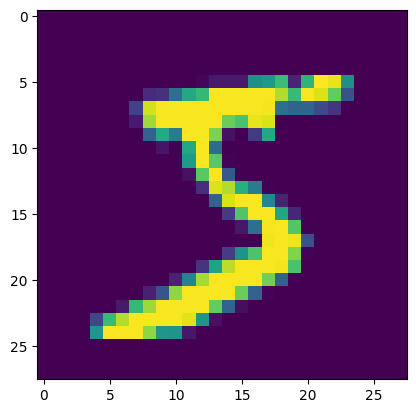

Label:  5


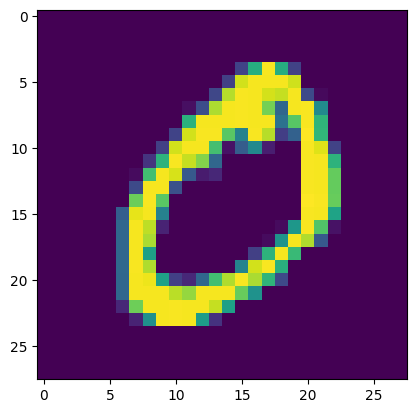

Label:  0


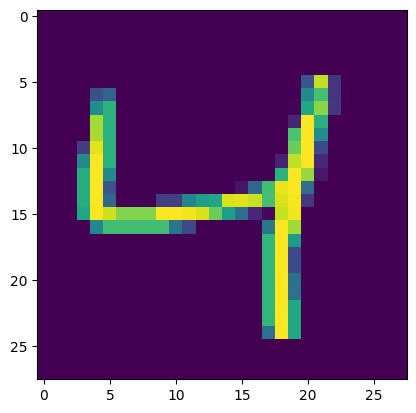

Label:  4


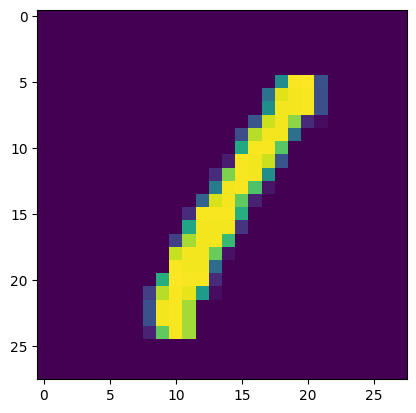

Label:  1


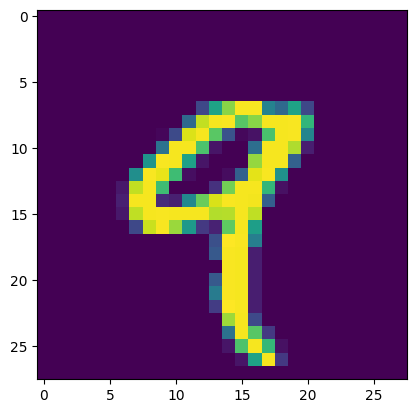

Label:  9


In [ ]:
for i in range(0,5):
  plt.imshow(x_train[i])
  plt.show()
  print('Label: ',y_train[i])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32') / 255

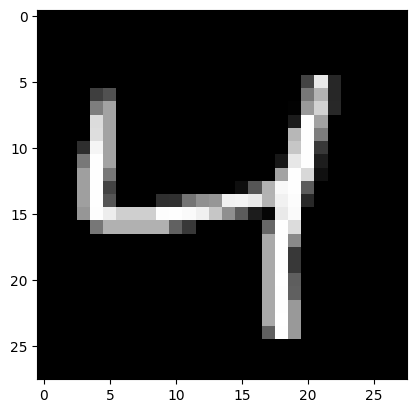

label 4


In [ ]:
#(x_train,y_train),(x_test,y_test) = mnist.load_data()
plt.imshow(x_train[2],cmap = 'gray')
plt.show()
print("label", y_train[2])

In [ ]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print("Train Shape is: ", x_train.shape)

Train Shape is:  (60000, 28, 28, 1)


In [ ]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape = (28,28,1)),
        keras.layers.Conv2D(32,kernel_size = (3,3),activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size = (2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(10,activation='softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
batch_size = 128
epochs = 10
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
model.fit(x_train,y_train,batch_size = batch_size,epochs = epochs,validation_split = 0.2)

Epoch 1/10
375/375 [==============================] - 13s 5ms/step - loss: 0.3243 - accuracy: 0.9117 - val_loss: 0.0931 - val_accuracy: 0.9728
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0792 - accuracy: 0.9763 - val_loss: 0.0649 - val_accuracy: 0.9814
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0586 - accuracy: 0.9830 - val_loss: 0.0518 - val_accuracy: 0.9852
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0454 - accuracy: 0.9863 - val_loss: 0.0587 - val_accuracy: 0.9814
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0400 - accuracy: 0.9875 - val_loss: 0.0432 - val_accuracy: 0.9877
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0336 - accuracy: 0.9900 - val_loss: 0.0465 - val_accuracy: 0.9868
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0491 - val_accuracy: 0.9851
Epoch

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 0)
print("Test loss:", score[0])
print("Test Accuracy:", score[1])

Test loss: 0.03351252153515816
Test Accuracy: 0.9894000291824341
